In [1]:
import os
os.environ["OMP_NUM_THREADS"]='1'
import matplotlib.pyplot as plt
import numpy as np
import pendula
import imp
import timeit
from shutil import rmtree
from IPython.display import Video

plt.rcParams.update({'font.size': 12, 'pdf.fonttype':42,'text.usetex': False, 'font.family': 'serif'})
imp.reload(pendula)

def spring(p0,p1,div,height):
    l=np.linalg.norm(p1-p0)
    xhat=(p1-p0)/l
    yhat=np.array([xhat[1],-xhat[0]])
    return np.concatenate([[p0,p0+l/div*xhat],[p0+i*l/div*xhat+height*yhat*(-1)**i for i in range(2,div-1)],[p1-l/div*xhat,p1]])

### Plot run from file

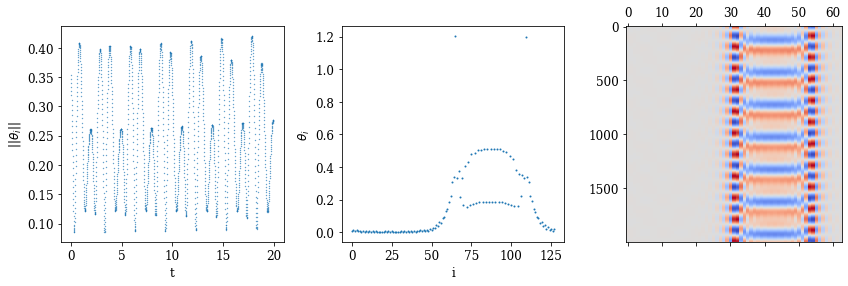

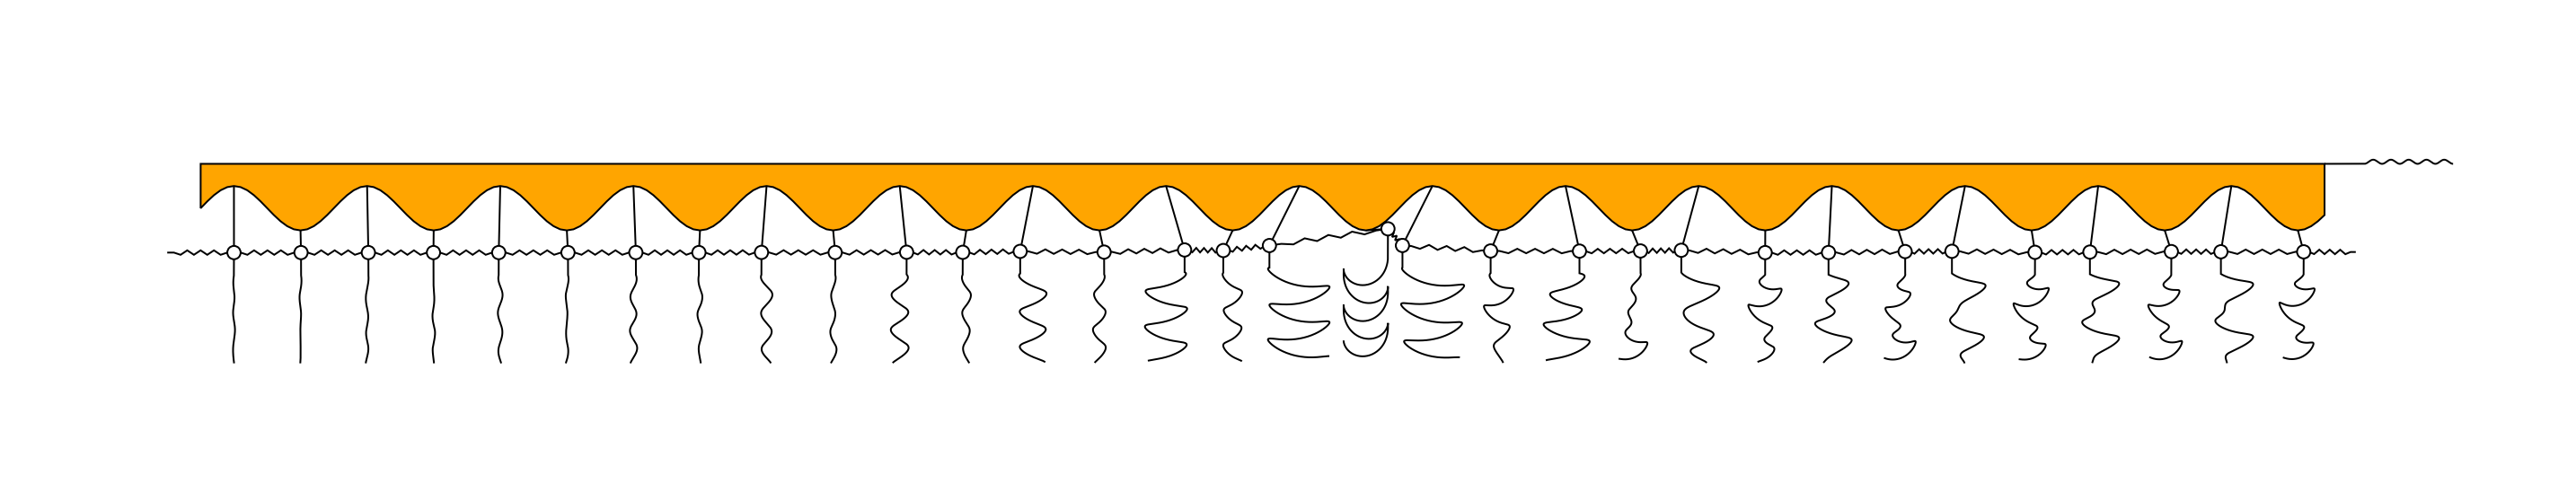

In [3]:
filebase='data/test/'

file=open(filebase+'out.dat')
N,tmax,t1,dt,amp,omega=np.array(file.readlines()[1].split(),dtype=np.float64)
N=int(N)
ys=np.load(filebase+'dat.npy')
roll=int(np.round(np.argmax(np.linalg.norm(ys[:,:N],axis=0)/len(ys)**0.5)/2))*2
ys=np.roll(ys[:,:N],round(N/2)-roll,axis=1)

fig,ax=plt.subplots(1,3,figsize=(12,4))
ax[0].scatter(x=dt*np.arange(len(ys)),y=np.linalg.norm(ys[:,:N],axis=1)/N**0.5,s=0.1)
ax[0].set_xlabel('t')
ax[0].set_ylabel(r'$|| \theta_i ||$')

ax[1].scatter(x=np.arange(N),y=np.linalg.norm(ys[:,:N],axis=0)/len(ys)**0.5,s=1)
ax[1].set_xlabel('i')
ax[1].set_ylabel(r'$\theta_i$')

dat=ys[::1,2:N:2]
ratio=len(dat[0])/len(dat)
ax[2].matshow(dat,aspect=ratio,cmap='coolwarm',vmin=np.min(dat),vmax=np.max(dat))

plt.tight_layout()
plt.show()

n0=64-16
n1=64+16

m=len(ys)-1
dm=500

z0=-amp*np.cos(2*np.pi*dt*m)

fig=plt.figure(figsize=((n1-n0)*10,10))
lengths=1+0.5*(-1)**np.arange(N)
f=(lambda x: 1-0.5*np.cos(np.pi*x/dx))
dx=1.5

background=plt.Polygon([[dx*(n0-n0)-1,-5],[dx*(n1-n0)+3,-5],[dx*(n1-n0)+3,5],[dx*(n0-n0)-1,5]],closed=True,facecolor='white')
plt.gca().add_patch(background)

n=np.mod(n0-2,N)+1
p0=np.array([dx*(0)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
p1=np.array([dx*(1)-lengths[n0]*np.sin(ys[m,n0]), z0+lengths[n0]-lengths[n0]*np.cos(ys[m,n0])])
line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
plt.gca().add_patch(line0)
for n in range(n0,n1-1):
    p0=np.array([dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
    p1=np.array([dx*(n+1-n0+1)-lengths[n+1]*np.sin(ys[m,n+1]), z0+lengths[n+1]-lengths[n+1]*np.cos(ys[m,n+1])])
    line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
    plt.gca().add_patch(line0)
n=np.mod(n1-1,N)+1
p0=np.array([dx*(n1-n0)-lengths[n1-1]*np.sin(ys[m,n1-1]), z0+lengths[n1-1]-lengths[n1-1]*np.cos(ys[m,n1-1])])
p1=np.array([dx*(n1-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
plt.gca().add_patch(line0)



for n in range(n0,n1):
    circle = plt.Circle((dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])), radius=0.15, facecolor='white',edgecolor='black',lw=2)
    line = plt.Polygon([(dx*(n-n0+1), z0+lengths[n]),(dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n]))],fill=None,closed=None,edgecolor='black', lw=2)
    line2 = plt.Polygon(np.concatenate([[(dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n]))],np.transpose([dx*(n-n0+1)-lengths[n]*np.sin(ys[m:m-dm:-1,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m:m-dm:-1,n])-0.5-2/dm*np.arange(dm)])]),fill=None,closed=None,edgecolor='black', lw=2)
    plt.gca().add_patch(line)
    plt.gca().add_patch(line2)
    plt.gca().add_patch(circle)

ceiling=plt.Polygon(np.concatenate([[[dx/2, 2+z0]],[[x, z0+f(x)] for x in np.arange(dx/2,(n1-n0)*dx+dx/2,dx/10)],[[(n1-n0)*dx+dx/2-dx/10, 2+z0]]]),closed=True,facecolor='orange',edgecolor='black',lw=2)
plt.gca().add_patch(ceiling)
line3=plt.Polygon(np.concatenate([[[(n1-n0)*dx+dx/2-dx/10,2+z0]],np.transpose([(n1-n0)*dx+dx+2/dm*np.arange(dm),2-amp*np.cos(2*np.pi*dt*(m-np.arange(dm)))])]),fill=None,closed=None,edgecolor='black', lw=2)
plt.gca().add_patch(line3)

plt.axis('scaled')
plt.axis('off')

plt.show()

### Cluster features in batch  

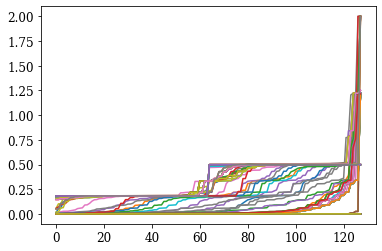

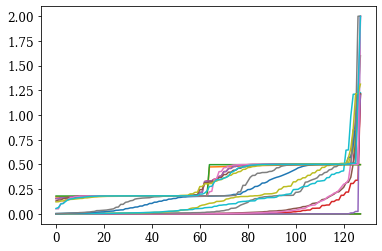

[11 13 17  6 34  3 42 51 25 58 12 57  2 27 16  1 41 88  7  8]
[ 7 10  9 14  3 11  5  2  2  2  5  2 17 10  4 10  3  2  9  2]


In [6]:
from scipy.cluster import vq
vals=np.loadtxt('data/batch.dat')

num=20
clusters=vq.kmeans(vals[:,1:],num)[0]
clusters=clusters[np.argsort(np.linalg.norm(clusters,axis=1))]
ids=vq.vq(vals[:,1:],clusters)[0]

for i in range(len(vals)):
    plt.plot(vals[i,1:])
plt.show()

plt.plot(np.transpose(clusters))
plt.show()

print(np.array([vals[np.where(ids==i)[0][0],0] for i in range(num)],dtype=int))
print(np.unique(ids,return_counts=True)[1])

array([ 57., 110.])

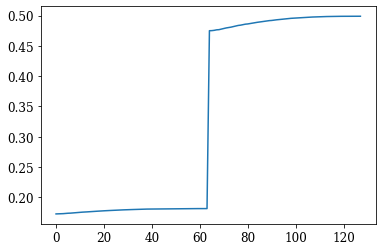

In [7]:
ind=11
plt.plot(clusters[ind])
vals[np.where(ids==ind)[0],0]

### Animation

In [8]:
filebase='data/test/'

file=open(filebase+'out.dat')
N,tmax,t1,dt,amp,omega=np.array(file.readlines()[1].split(),dtype=np.float64)
N=int(N)
ys=np.load(filebase+'dat.npy')
roll=int(np.round(np.argmax(np.linalg.norm(ys[:,:N],axis=0)/len(ys)**0.5)/2))*2
ys=np.roll(ys[:,:N],round(N/2)-roll,axis=1)

n0=64-16
n1=64+16

dm=500
m0=len(ys)-2000+dm
m1=len(ys)

if os.path.isdir(filebase+'animation'):
    rmtree(filebase+'animation')
if not os.path.isdir(filebase+'animation'):
    os.mkdir(filebase+'animation')

for m in range(m0,m1):
    print(m,end='\t\r')
    z0=-amp*np.cos(2*np.pi*dt*m)
    fig=plt.figure(figsize=((n1-n0)*10,10))
    lengths=1+0.5*(-1)**np.arange(N)
    f=(lambda x: 1-0.5*np.cos(np.pi*x/dx))
    dx=1.5
    
    background=plt.Polygon([[dx*(n0-n0)-1,-5],[dx*(n1-n0)+5,-5],[dx*(n1-n0)+5,5],[dx*(n0-n0)-1,5]],closed=True,facecolor='white')
    plt.gca().add_patch(background)
    
    ceiling=plt.Polygon(np.concatenate([[[dx/2, 2+z0]],[[x, z0+f(x)] for x in np.arange(dx/2,(n1-n0)*dx+dx/2,dx/10)],[[(n1-n0)*dx+dx/2-dx/10, 2+z0]]]),closed=True,facecolor='orange',edgecolor='black',lw=2)
    plt.gca().add_patch(ceiling)

    n=np.mod(n0-2,N)+1
    p0=np.array([dx*(0)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
    p1=np.array([dx*(1)-lengths[n0]*np.sin(ys[m,n0]), z0+lengths[n0]-lengths[n0]*np.cos(ys[m,n0])])
    line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
    plt.gca().add_patch(line0)
    for n in range(n0,n1-1):
        p0=np.array([dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
        p1=np.array([dx*(n+1-n0+1)-lengths[n+1]*np.sin(ys[m,n+1]), z0+lengths[n+1]-lengths[n+1]*np.cos(ys[m,n+1])])
        line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
        plt.gca().add_patch(line0)
    n=np.mod(n1-1,N)+1
    p0=np.array([dx*(n1-n0)-lengths[n1-1]*np.sin(ys[m,n1-1]), z0+lengths[n1-1]-lengths[n1-1]*np.cos(ys[m,n1-1])])
    p1=np.array([dx*(n1-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
    line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
    plt.gca().add_patch(line0)

        
    for n in range(n0,n1):
        circle = plt.Circle((dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])), radius=0.15, facecolor='white',edgecolor='black',lw=2)
        line = plt.Polygon([(dx*(n-n0+1), z0+lengths[n]),(dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n]))],fill=None,closed=None,edgecolor='black', lw=2)
        line2 = plt.Polygon(np.concatenate([[(dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n]))],np.transpose([dx*(n-n0+1)-lengths[n]*np.sin(ys[m:m-dm:-1,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m:m-dm:-1,n])-0.5-2/dm*np.arange(dm)])]),fill=None,closed=None,edgecolor='black', lw=2)
        plt.gca().add_patch(line)
        plt.gca().add_patch(line2)
        plt.gca().add_patch(circle)

    line3=plt.Polygon(np.concatenate([[[(n1-n0)*dx+dx/2-dx/10,2+z0]],np.transpose([(n1-n0)*dx+dx+2/dm*np.arange(dm),2-amp*np.cos(2*np.pi*dt*(m-np.arange(dm)))])]),fill=None,closed=None,edgecolor='black', lw=2)
    plt.gca().add_patch(line3)

    plt.axis('scaled')
    plt.axis('off')
    
    fig.savefig(filebase+'animation/'+str(m-m0).zfill(4)+'.png', dpi=100,bbox_inches='tight')
    plt.close('all')

os.system('encode.sh ' + filebase+'animation/' + ' ' + filebase + 'animation 60 ')
if os.path.isdir(filebase+'animation'):
    rmtree(filebase+'animation')
Video(filebase+'animation.mp4',width=1024)

### Run in notebook

In [272]:
N=128
init=0.5
delta=0.5
outcycle=0
cycles=5000
dt=0.05
amp=0.047
freq=3.4
seed=25

np.random.seed(seed)
y0=np.zeros(2*N)
y0[:N] = init*2*np.pi*(np.random.random(N)-0.5)
lengths=np.array([1+delta*(-1)**i for i in range(N)])

start=timeit.default_timer()
ys=pendula.runsim(y0, lengths, cycles, outcycle, dt, amp, freq)
stop=timeit.default_timer()
print(stop-start)

38.68627719487995


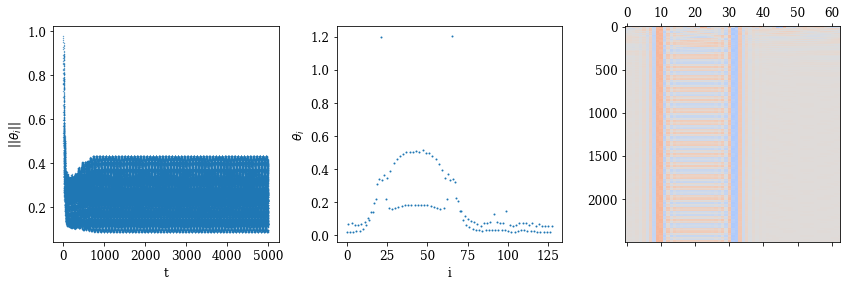

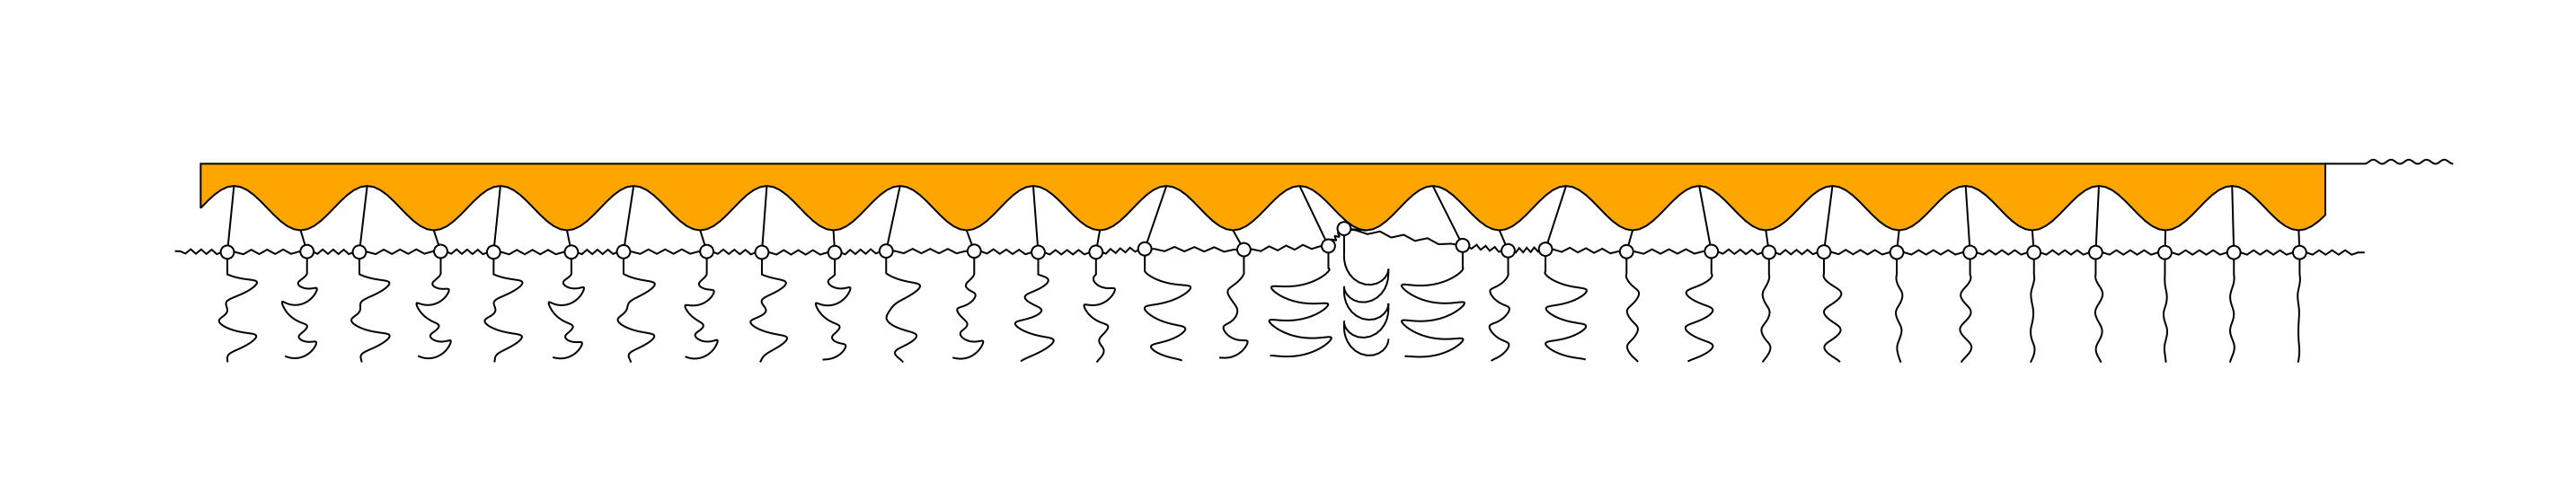

In [273]:
roll=int(np.round(np.argmax(np.linalg.norm(ys[:,:N],axis=0)/len(ys)**0.5)/2))*2
ys=np.roll(ys[:,:N],round(N/2)-roll,axis=1)

fig,ax=plt.subplots(1,3,figsize=(12,4))
ax[0].scatter(x=dt*np.arange(len(ys)),y=np.linalg.norm(ys[:,:N],axis=1)/N**0.5,s=0.1)
ax[0].set_xlabel('t')
ax[0].set_ylabel(r'$|| \theta_i ||$')

ax[1].scatter(x=np.arange(N),y=np.linalg.norm(ys[:,:N],axis=0)/len(ys)**0.5,s=1)
ax[1].set_xlabel('i')
ax[1].set_ylabel(r'$\theta_i$')

dat=ys[::int(np.round(2/dt)),2:N:2]
ratio=len(dat[0])/len(dat)
ax[2].matshow(dat,aspect=ratio,cmap='coolwarm',vmin=np.min(dat),vmax=np.max(dat))

plt.tight_layout()
plt.show()

n0=64-16
n1=64+16

m=len(ys)-1
dm=100

z0=-amp*np.cos(2*np.pi*dt*m)

fig=plt.figure(figsize=((n1-n0)*10,10))
lengths=1+0.5*(-1)**np.arange(N)
f=(lambda x: 1-0.5*np.cos(np.pi*x/dx))
dx=1.5

background=plt.Polygon([[dx*(n0-n0)-1,-5],[dx*(n1-n0)+3,-5],[dx*(n1-n0)+3,5],[dx*(n0-n0)-1,5]],closed=True,facecolor='white')
plt.gca().add_patch(background)

n=np.mod(n0-2,N)+1
p0=np.array([dx*(0)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
p1=np.array([dx*(1)-lengths[n0]*np.sin(ys[m,n0]), z0+lengths[n0]-lengths[n0]*np.cos(ys[m,n0])])
line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
plt.gca().add_patch(line0)
for n in range(n0,n1-1):
    p0=np.array([dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
    p1=np.array([dx*(n+1-n0+1)-lengths[n+1]*np.sin(ys[m,n+1]), z0+lengths[n+1]-lengths[n+1]*np.cos(ys[m,n+1])])
    line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
    plt.gca().add_patch(line0)
n=np.mod(n1-1,N)+1
p0=np.array([dx*(n1-n0)-lengths[n1-1]*np.sin(ys[m,n1-1]), z0+lengths[n1-1]-lengths[n1-1]*np.cos(ys[m,n1-1])])
p1=np.array([dx*(n1-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
plt.gca().add_patch(line0)



for n in range(n0,n1):
    circle = plt.Circle((dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])), radius=0.15, facecolor='white',edgecolor='black',lw=2)
    line = plt.Polygon([(dx*(n-n0+1), z0+lengths[n]),(dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n]))],fill=None,closed=None,edgecolor='black', lw=2)
    line2 = plt.Polygon(np.concatenate([[(dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n]))],np.transpose([dx*(n-n0+1)-lengths[n]*np.sin(ys[m:m-dm:-1,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m:m-dm:-1,n])-0.5-2/dm*np.arange(dm)])]),fill=None,closed=None,edgecolor='black', lw=2)
    plt.gca().add_patch(line)
    plt.gca().add_patch(line2)
    plt.gca().add_patch(circle)

ceiling=plt.Polygon(np.concatenate([[[dx/2, 2+z0]],[[x, z0+f(x)] for x in np.arange(dx/2,(n1-n0)*dx+dx/2,dx/10)],[[(n1-n0)*dx+dx/2-dx/10, 2+z0]]]),closed=True,facecolor='orange',edgecolor='black',lw=2)
plt.gca().add_patch(ceiling)
line3=plt.Polygon(np.concatenate([[[(n1-n0)*dx+dx/2-dx/10,2+z0]],np.transpose([(n1-n0)*dx+dx+2/dm*np.arange(dm),2-amp*np.cos(2*np.pi*dt*(m-np.arange(dm)))])]),fill=None,closed=None,edgecolor='black', lw=2)
plt.gca().add_patch(line3)

plt.axis('scaled')
plt.axis('off')

plt.show()